In [1]:
import time
import torch
from pathlib import Path
import scipy.io.wavfile as wav
from tfst import TFST
import warnings
import numpy as np

In [2]:
file_path = Path('.') / Path('tempest_3rd.wav')
device = 'cuda:0'

In [3]:
warnings.filterwarnings("ignore", category=wav.WavFileWarning)
fs, signal = wav.read(file_path)

In [4]:
signal_tensor = torch.tensor(signal, device=device)

In [5]:
tfst_layer = TFST()

In [6]:
spectrogram = tfst_layer(signal_tensor)

In [7]:
spectrogram_numpy = spectrogram.cpu().numpy()
spectrogram_db = 20 * np.log10(spectrogram_numpy + np.finfo(np.float32).eps)
time_vector = spectrogram_numpy.shape[-1] * tfst_layer.hop_length / tfst_layer.fs

In [8]:
%matplotlib notebook
import ipywidgets as wid
import matplotlib.pyplot as plt
from MIDISynth import plot_time_frequency
import matplotlib.ticker as tick

<IPython.core.display.Javascript object>


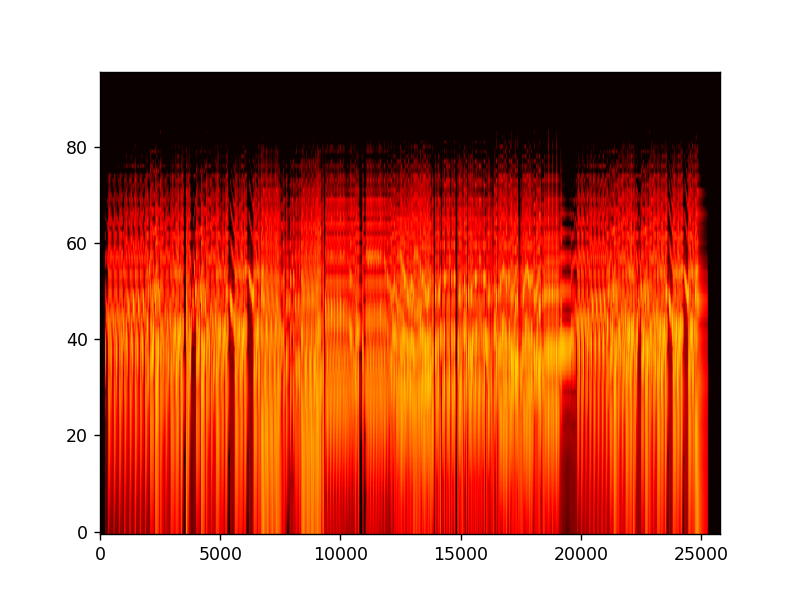

interactive(children=(IntSlider(value=0, description='w', max=1), Output()), _dom_classes=('widget-interact',)…

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

image = ax.imshow(spectrogram_db[0, :, :], cmap='hot', aspect='auto', vmin=-100, vmax=0, origin='lower')

def update(w = 0):
    image.set_data(spectrogram_db[w, :, :])
    fig.canvas.draw_idle()

wid.interact(update, x=(0, 10, 1));